In [65]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [66]:
filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/16/1481853606.h5'

In [67]:
h = katdal.open(filename)

In [68]:
print h

Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/16/1481853606.h5 (version 3.0)
Observer: Simphiwe  Experiment ID: 20161215-0061
Description: 'Generic Phaseup for all targets'
Observed from 2016-12-16 04:00:09.481 SAST to 2016-12-16 04:06:17.325 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m006,m007,m008,m010,m014,m015,m021,m022,m025,m031,m062,m063  24      312
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M4k   1284.000         856.000           4096       208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m008', 'm010', 'm007', 'm014', 'm006', 'm063', 'm015', 'm021', 'm022', 'm025', 'm031', 'm062']
  spw=0
-------------------------------------------------------------------------------
Shape: (92 dumps, 4096 chan

In [69]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_B  ---  20
    cal_product_K  ---  10
    cal_product_G  ---  385


In [70]:
np.set_printoptions(precision=4,suppress=True)

In [71]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V162">
[['m006', 'm007', 'm008', 'm010', 'm014', 'm015', 'm021', 'm022', 'm025', 'm031', 'm062', 'm063']]
['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm021' 'm022' 'm025' 'm031'
 'm062' 'm063']


# Delays

In [72]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [73]:
k_array.shape #Times,Pols,Antennas

(10, 2, 12)

In [74]:
# print delays (if there are few delays)
print 'POL 0: \n', k_0[0], "\n",k_0[-1]
print 'POL 1: \n', k_1[0],"\n" ,k_1[-1]

POL 0: 
[ 139.1905   42.1241  107.6369   14.957    81.8807  122.574   485.4966
  467.8722   -0.     -140.5337  106.7198  104.1275] 
[-0.0028 -0.0016 -0.0485 -0.043  -0.0298 -0.0289  0.0144 -0.0049 -0.
 -0.0534 -0.0462 -0.0141]
POL 1: 
[ 141.1116   40.3584  106.6584  107.2526   82.0427  120.8542  483.2259
  465.5732   -0.     -140.6611  101.4475   98.7109] 
[-0.0026 -0.0051 -0.0511 -0.0306 -0.0408 -0.0325  0.0124  0.0022 -0.
 -0.0675 -0.0745 -0.0287]


In [75]:
print labels

['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm021' 'm022' 'm025' 'm031'
 'm062' 'm063']


In [76]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid']

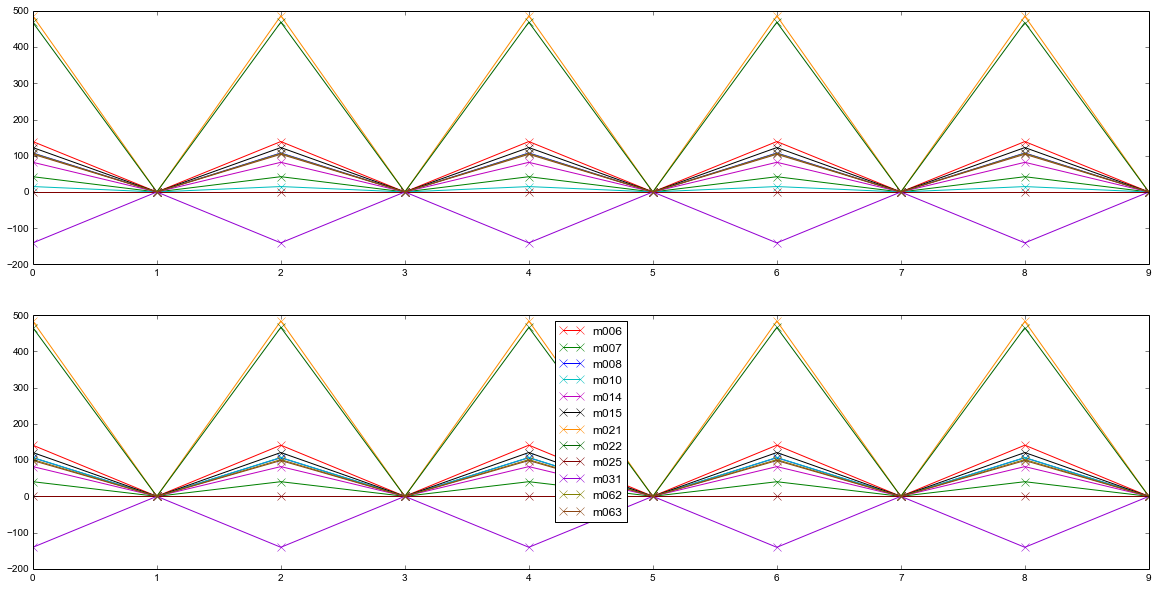

In [77]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')

# Gains

In [78]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(385, 2, 12)


In [79]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 0.9992  1.002   0.9998  1.0013  0.9992  1.0003  0.9993  1.0001  1.0005
  1.0009  1.0011  1.002 ]
[ 0.9985  1.0013  1.001   1.0013  0.9998  1.      0.9988  1.0007  0.9997
  1.0006  1.0012  1.0036]


In [80]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 0.9977  0.9986  1.0023  1.0018  1.0004  1.0005  0.998   0.997   1.0016
  1.0023  0.9985  1.0039]
[ 0.9964  1.0013  1.0001  1.0012  1.      1.0013  0.9976  0.9981  1.0025
  1.003   0.9965  1.0076]


In [81]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[ 0.9985  0.9966  1.0025  1.0005  1.0012  1.0002  0.9987  0.9969  1.0012
  1.0014  0.9974  1.0019]
[ 0.9979  1.      0.9991  0.9998  1.0003  1.0013  0.9988  0.9975  1.0028
  1.0024  0.9953  1.004 ]


In [82]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[  57.3417   69.689   133.4294   58.0222  142.1045   79.9885  120.3601
   67.9277   -0.      -13.8514  115.8707  -15.7258]
[  40.5693   95.8538  100.7889   70.8848   71.1169   60.5218  107.0404
   52.6632    0.       39.6722   47.3099   70.2098]


In [83]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[  78.3522   80.7978  150.4107   91.1525  163.5088   84.8335  148.5384
   85.3147    0.      -18.9859  132.2597   14.6054]
[  32.078    96.8471  117.0454  109.2076   90.0451   55.9038  128.5042
   66.0652    0.       23.7301   57.199    85.137 ]


In [84]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[ 21.0105  11.1088  16.9813  33.1302  21.4043   4.845   28.1783  17.387
   0.      -5.1345  16.389   30.3312]
[ -8.4913   0.9932  16.2565  38.3228  18.9282  -4.618   21.4638  13.402
   0.     -15.9421   9.889   14.9272]


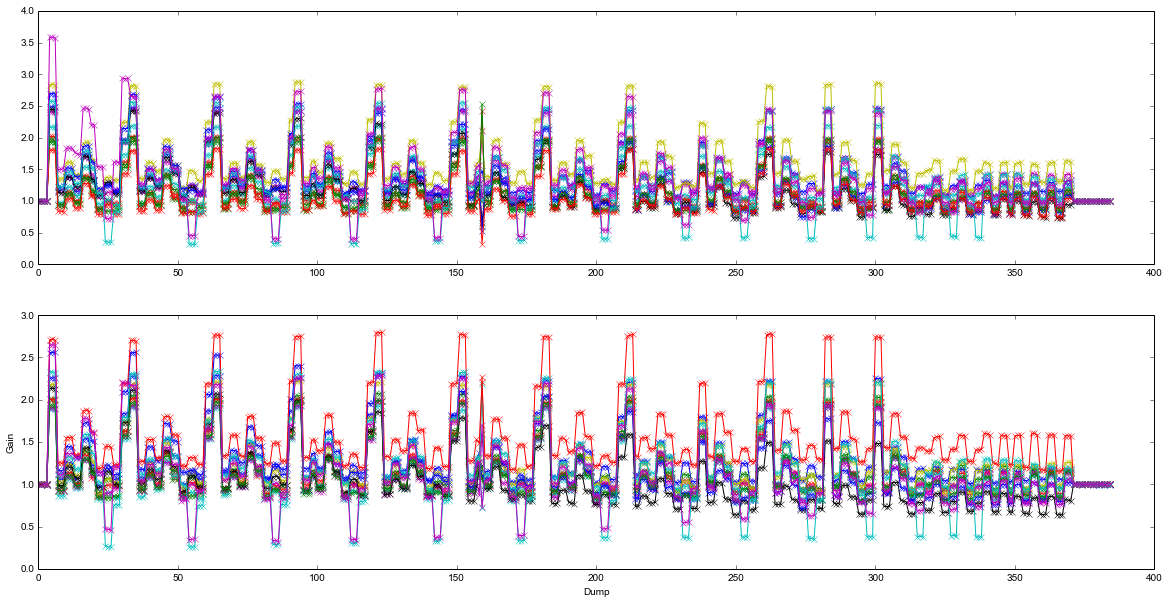

In [85]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
plt.legend()

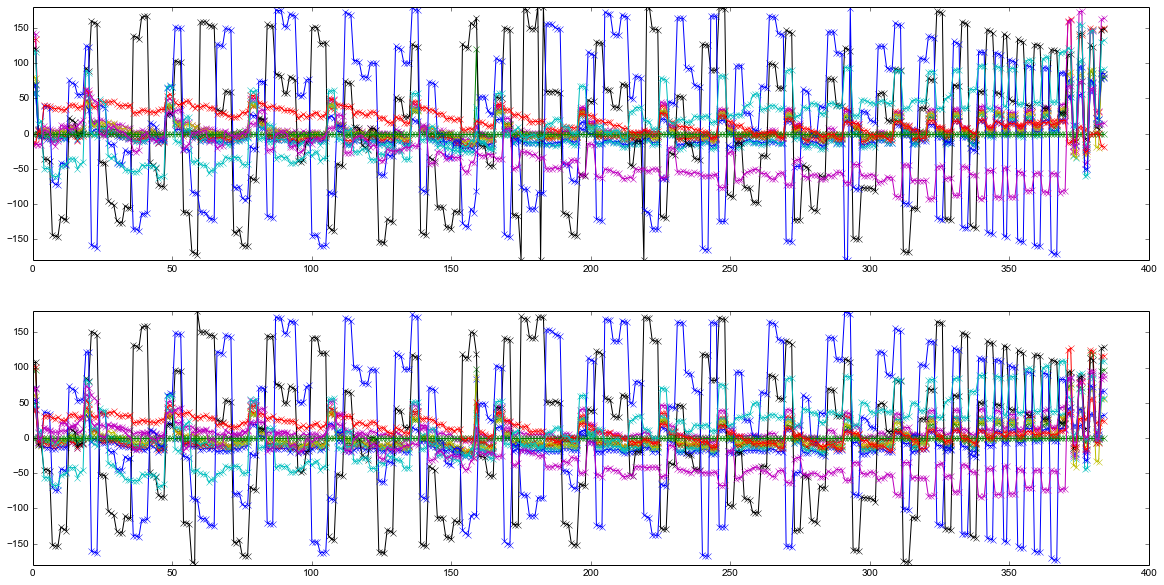

In [86]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

# Bandpasses    

In [87]:
b = h.file['TelescopeState']['cal_product_B']
b_list = []
for i, bi in enumerate(b):
    b_list.append(pickle.loads(bi[-1]))
b_array = np.array(b_list)
print b_array.shape
# bandpass shape is ntimes x channels x pol x antenna 
# where ntimes is the number of bandpasses

# just look at LAST bandpass for now
b_0_0 = b_array[-1,:,0,:]
b_1_0 = b_array[-1,:,1,:]



(20, 4096, 2, 12)


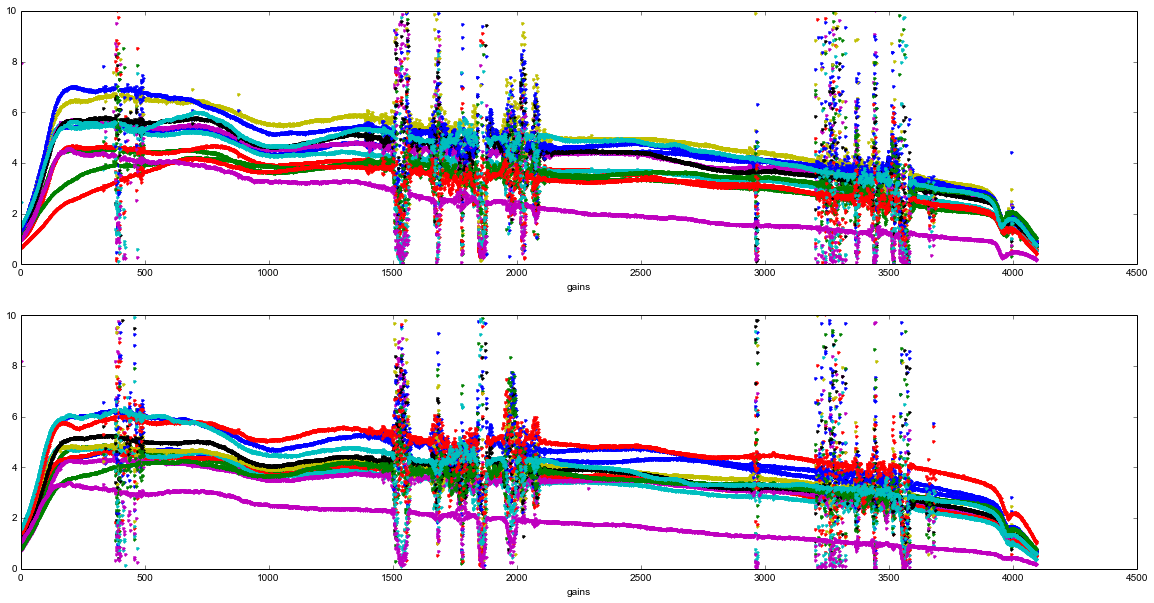

In [88]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_0),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_0),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

In [89]:
""""
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')
"""

'"\nfor i in range(len(labels)):\n    ax[0].plot(k_0[:,i],\'-x\',markersize=8,label=labels[i],color=colors[i]);\n#ax[0].set_ylim([-0.2,0.2]);\n    ax[1].plot(k_1[:,i],\'-x\',markersize=8,label=labels[i],color=colors[i]);\n#ax[1].set_ylim([-0.2,0.2]);\nplt.legend(loc=\'upper center\')\n'

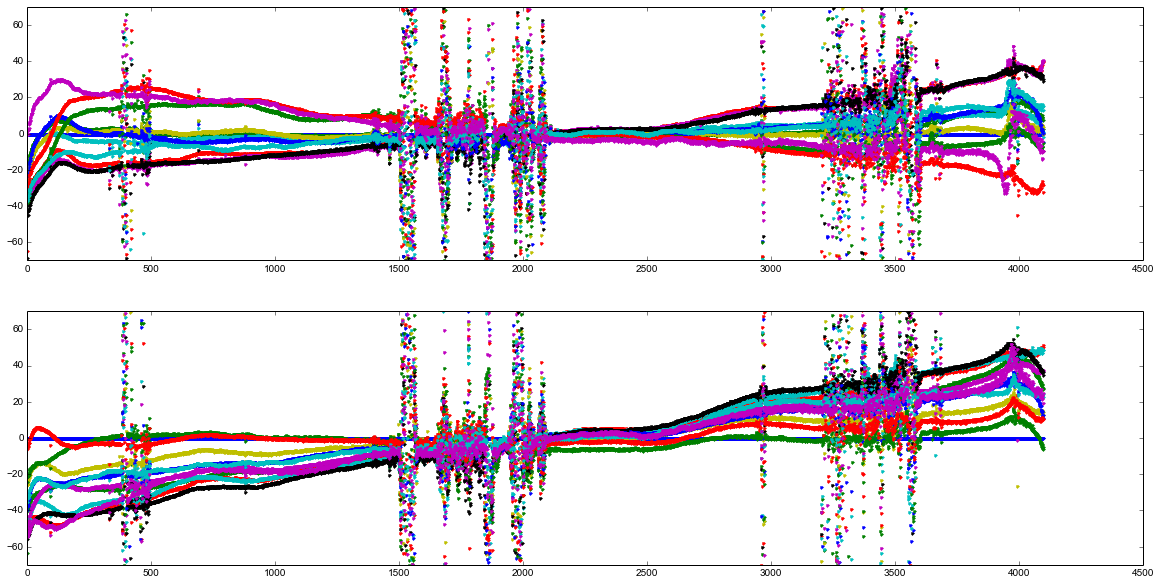

In [90]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].set_ylim([-70,70]);
ax[1].set_ylim([-70,70]);
ax[0].plot(np.rad2deg(np.angle(b_0_0)),'.');
ax[1].plot(np.rad2deg(np.angle(b_1_0)),'.');
plt.legend()

In [91]:
len(labels)

12

In [92]:
b_array.shape
# Time,channels,pols,antennas

(20, 4096, 2, 12)

In [93]:
#One bandpass at the END
antn=11
b_0_1 = b_array[-1,:,0,antn]
b_1_1 = b_array[-1,:,1,antn]
print b_1_1.shape
print a_array[:,antn]

(4096,)
['m063']


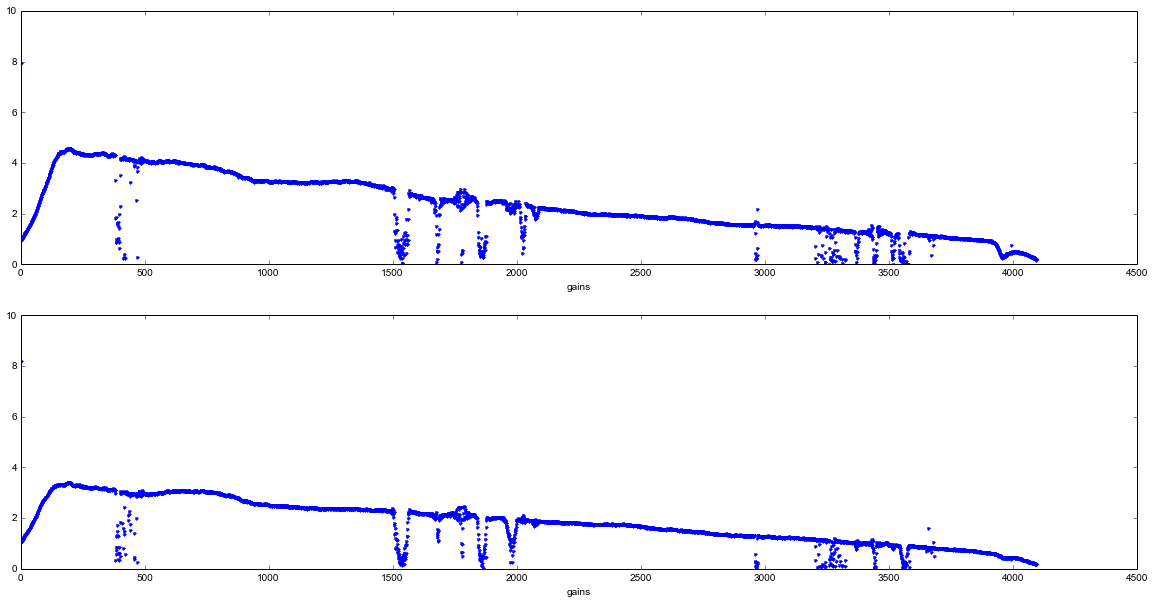

In [94]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_1),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_1),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

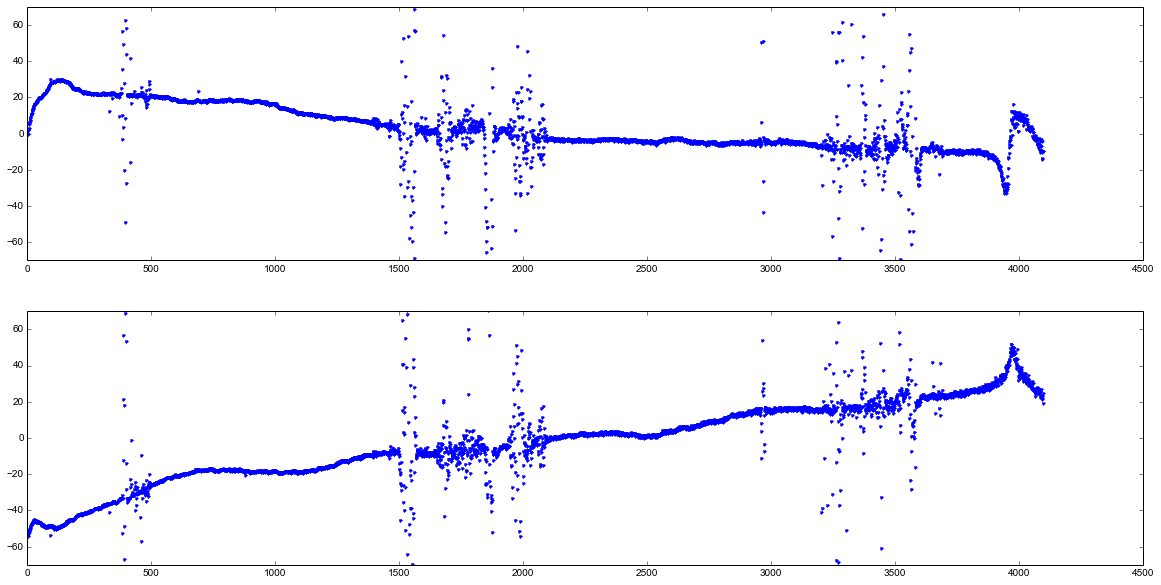

In [95]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_1)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_1)),'.');
ax[1].set_ylim([-70,70]);

In [96]:
str(h.catalogue.targets[0])

'Nothing, tags=special, no flux info'

# M063 crazy solutions